In [13]:
# pip install wordcloud

In [8]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image



In [2]:
born_again_prep = pd.read_csv('daredevil_born_again_sentiment.csv')

In [3]:
born_again_df = born_again_prep.drop('Unnamed: 0', axis=1)

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment_vader = SentimentIntensityAnalyzer()
born_again_df['Title_Sentiment_Score'] = born_again_df['Titles'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])
born_again_df['Review_Sentiment_Score'] = born_again_df['Reviews'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])

def sentiment_category_vader(sentiment):
        if sentiment >= 0.05:
            return "Positive"
        elif sentiment <= -0.05:
            return "Negative"
        else:
            return "Neutral"
        
born_again_df['Title_sentiment_Vader'] = born_again_df['Title_Sentiment_Score'].apply(sentiment_category_vader)
born_again_df['Review_Sentiment_Vader'] = born_again_df['Review_Sentiment_Score'].apply(sentiment_category_vader)

born_again_df

,User_Ratings,Review_Dates,Titles,Reviews,Likes,Dislikes,Series,Network,Title_Sentiment_Score,Review_Sentiment_Score,Title_sentiment_Vader,Review_Sentiment_Vader
0,9,"Aug 9, 2025",Daredevil is back,I can't tell you how glad I am that Daredevil ...,71,1,Daredevil: Born Again,Disney+,0.1280,0.9917,Positive,Positive
1,8,"Jul 11, 2025",Solid revival,Daredevil: Born Again was announced several ye...,54,3,Daredevil: Born Again,Disney+,0.1531,0.9663,Positive,Positive
2,10,"Aug 9, 2025",Fantastic,I don't even know where to begin in describing...,66,3,Daredevil: Born Again,Disney+,0.5574,0.9184,Positive,Positive
3,9,"Jul 26, 2025",call Rome,Historians of the far future looking back at o...,48,3,Daredevil: Born Again,Disney+,0.0000,0.9787,Neutral,Positive
4,8,"Jul 6, 2025",A Solid Return for the Devil of Hell's Kitchen,This spiritual sequel doesn't try to be Season...,48,3,Daredevil: Born Again,Disney+,-0.5859,0.9929,Negative,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
302,4,"Apr 18, 2025",An insult to Netflix's D.D.,A huge disappointment after waiting a long tim...,3,3,Daredevil: Born Again,Disney+,-0.5106,-0.9643,Negative,Negative
303,5,"Apr 20, 2025",Very Meh...Very Disney,"Overall, it was just ok. Nowhere near as good ...",7,13,Daredevil: Born Again,Disney+,0.0000,0.8725,Neutral,Positive
304,5,"Mar 6, 2025",S tier Marvel,Okay i am a Marvel Comic Book fan that has bee...,9,23,Daredevil: Born Again,Disney+,0.4215,0.9776,Positive,Positive
305,3,"Apr 21, 2025",Clearly not the Netflix version.,Poorly written without loyalty to the true cha...,6,13,Daredevil: Born Again,Disney+,0.4019,-0.9777,Positive,Negative


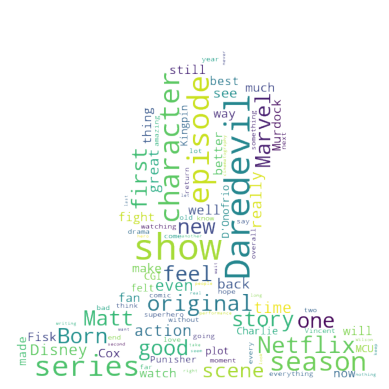

In [19]:
reviews = ' '.join(born_again_df['Reviews'])

kingpin_mask = np.array(Image.open("kingpin2-removebg-preview.png"))

kingpin_mask

# replace 0 with 255
kingpin_mask[kingpin_mask == 0] = 255
kingpin_mask

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="rgba(255, 255, 255, 0)", mode="RGBA", mask=kingpin_mask, collocations=False).generate(reviews)

wordcloud.words_

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
wordcloud.to_file("kingpin_wordcloud2.png")

In [27]:
word_frequency = wordcloud.words_

words = word_frequency

word_frequency_born_again = pd.DataFrame(list(words.items()), columns=['words', 'frequency']) 

word_frequency_born_again.to_csv('word_frequency_born_again.csv')